# Regression
## Exploration Exercises

Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Do your work in a notebook named explore_telco. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

2. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

3. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

4. Save the functions you have written to create visualizations in a file named explore.py. Rewrite your notebook code so that you are using the functions imported from this file.

5. Explore your dataset with any other visualizations you think will be helpful.

6. In a seperate notebook, use the functions you have developed in this exercise with the mall customers dataset.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import stats

import acquire
from prepare import get_telco_data, prep_telco

plt.rc('font', size=13)
plt.rc('figure', figsize=(13,7))

In [12]:
df = get_telco_data()
df.head()
# change to wrangle function to have the scaled data

,customer_id,contract_type_id,phone_service,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn
0,0002-ORFBO,2,Yes,1,Female,0,Yes,Yes,9,No,Yes,No,Yes,Yes,No,65.6,593.3,No
1,0003-MKNFE,1,Yes,1,Male,0,No,No,9,No,No,No,No,No,Yes,59.9,542.4,No
2,0004-TLHLJ,1,Yes,2,Male,0,No,No,4,No,No,Yes,No,No,No,73.9,280.85,Yes
3,0011-IGKFF,1,Yes,2,Male,1,Yes,No,13,No,Yes,Yes,No,Yes,Yes,98.0,1237.85,Yes
4,0013-EXCHZ,1,Yes,2,Female,1,Yes,No,3,No,No,No,Yes,Yes,No,83.9,267.4,Yes


In [13]:
df = prep_telco()
df.head()

# note to self: remap internet_type (wrap around ,-1)

,contract_type,phone,internet_type,senior,partner,depend,tenure,monthly_charges,total_charges,churn,num_add_ons,is_male,tenure_yrs
customer_id,,,,,,,,,,,,,
0002-ORFBO,1,1,0,0,1,1,9,65.6,593.30,0,3,0,0.75
0003-MKNFE,0,1,0,0,0,0,9,59.9,542.40,0,1,1,0.75
0004-TLHLJ,0,1,1,0,0,0,4,73.9,280.85,1,1,1,0.33
0011-IGKFF,0,1,1,1,1,0,13,98.0,1237.85,1,4,1,1.08
0013-EXCHZ,0,1,1,1,1,0,3,83.9,267.40,1,2,0,0.25


In [14]:
train_and_validate, test = train_test_split(df, test_size=.1, random_state=666)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=666)

train.shape, validate.shape, test.shape

((5695, 13), (633, 13), (704, 13))

In [42]:
def plot_variable_pairs(df, drop_scaled_columns=True):
    if drop_scaled_columns:
        # drop the scaled columns first
        scaled_columns = [c for c in df.columns if c.endswith('_scaled')]
        df = df.drop(columns=scaled_columns)
        
    g = sns.PairGrid(df)
    #g.map_offdiag(sns.regplot)
    g.map_diag(sns.distplot)
    g.map_offdiag(sns.regplot, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"})
    #g.map_diag(plt.hist)
    
    return g

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


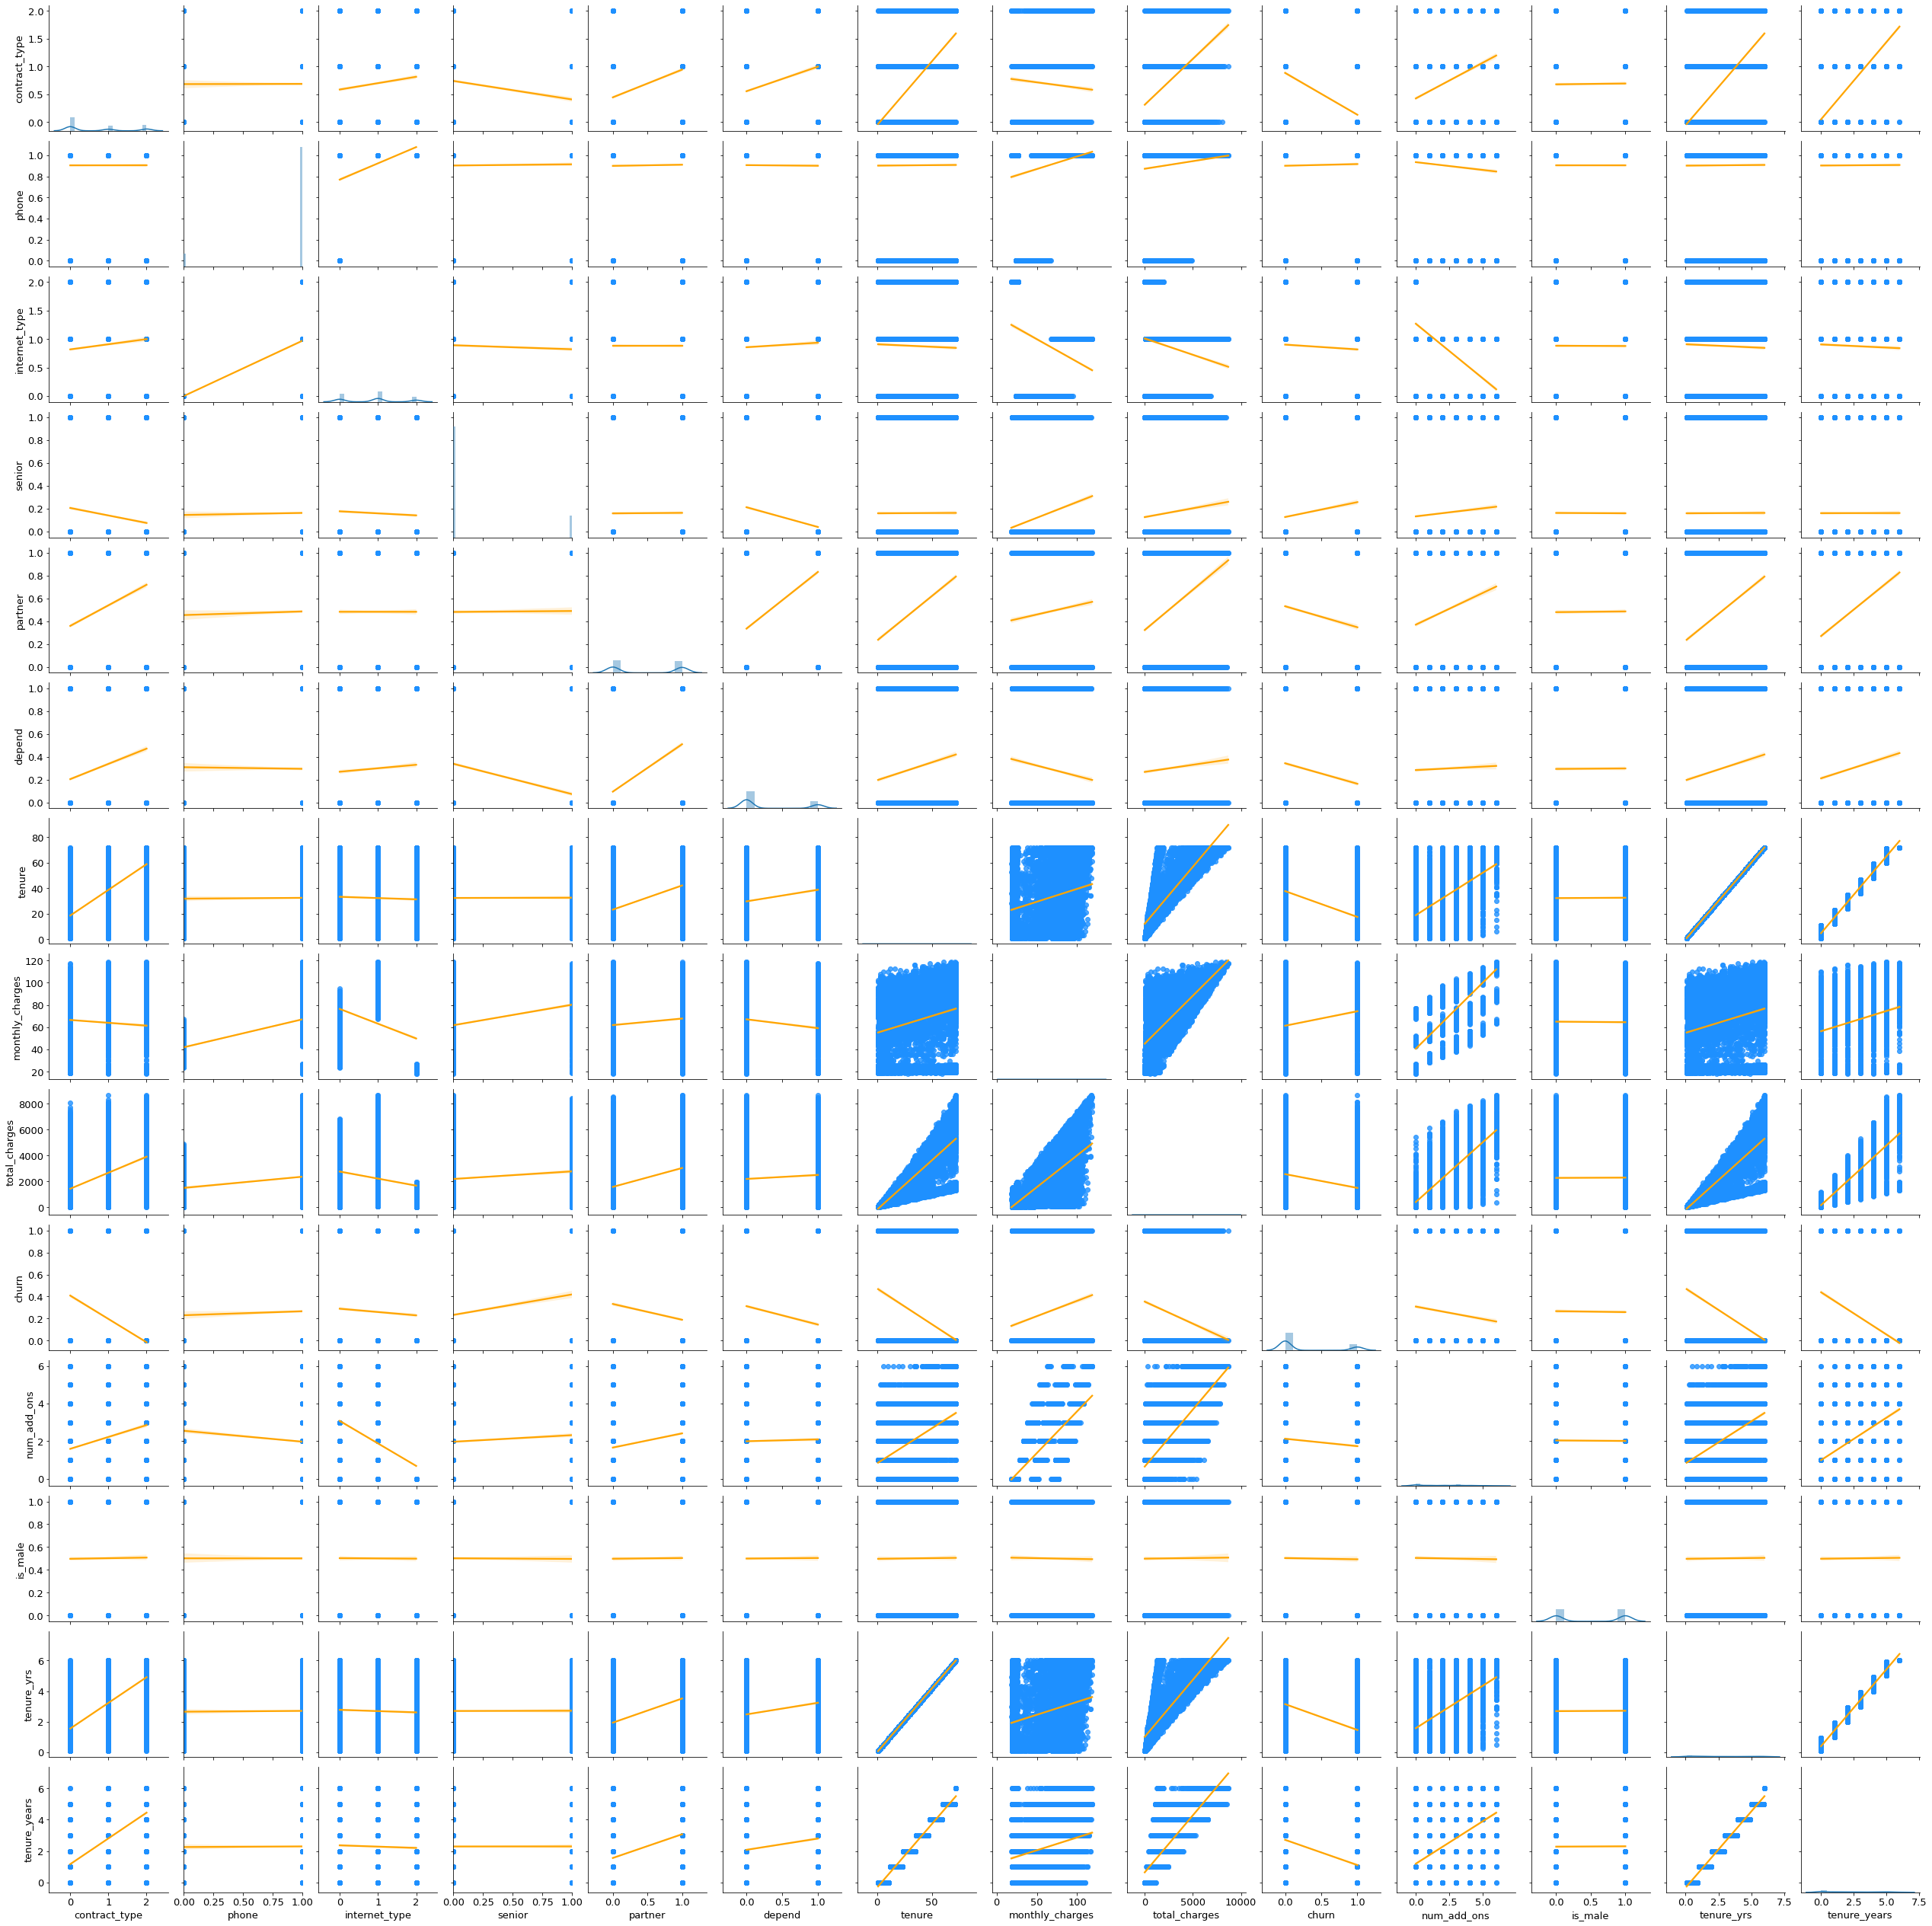

In [43]:
plot_variable_pairs(train, False)

In [44]:
train.dtypes

contract_type        int64
phone                int64
internet_type        int64
senior               int64
partner              int64
depend               int64
tenure               int64
monthly_charges    float64
total_charges      float64
churn                int64
num_add_ons          int64
is_male              int64
tenure_yrs         float64
tenure_years         int64
dtype: object

In [20]:
import math

# months_to_years
def months_to_years(df):
    return train.assign(tenure_years=(train.tenure / 12).apply(math.floor))

In [22]:
train = months_to_years(train)

In [38]:
def plot_categorical_and_continuous_vars(df, cate_var, cont_var):
    sns.barplot(data=df, y=cont_var, x=cate_var)
    plt.show()
    sns.violinplot(data=df, y=cont_var, x=cate_var)
    plt.show()
    sns.boxplot(data=df, y=cont_var, x=cate_var)
    plt.tight_layout()

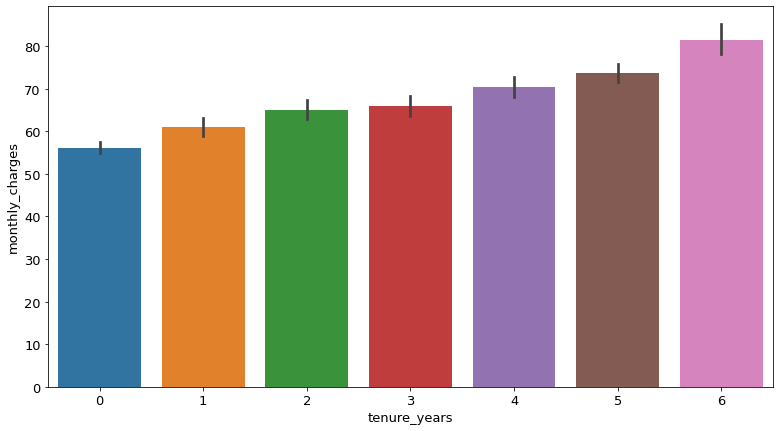

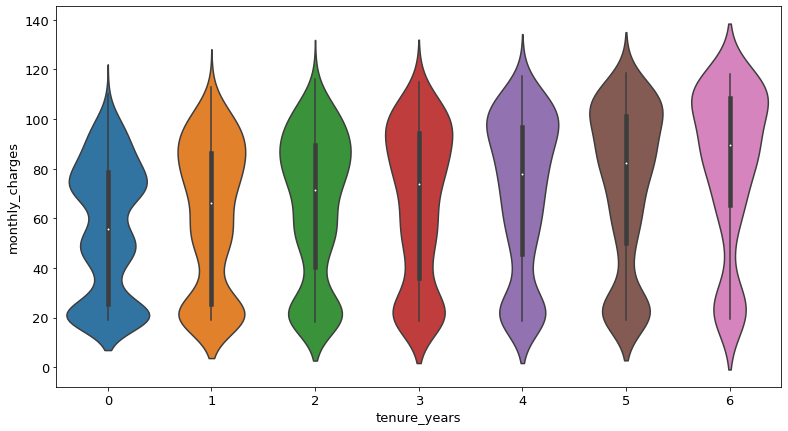

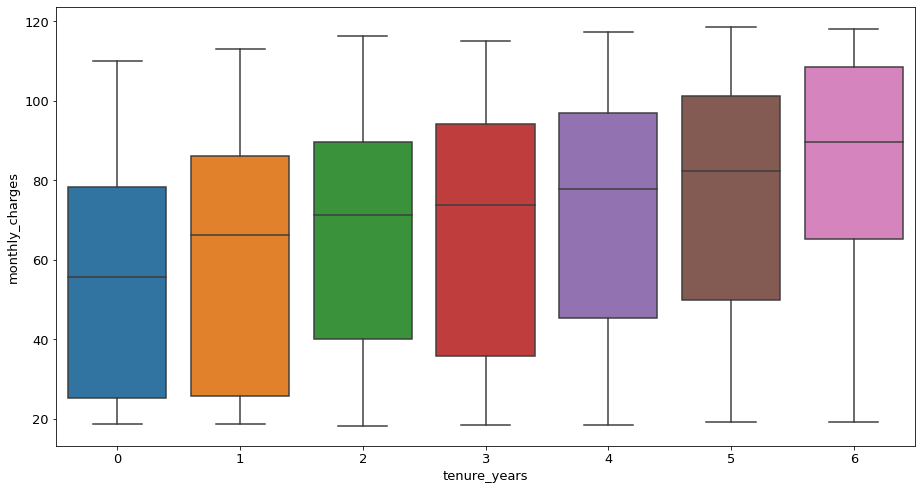

In [41]:
plot_categorical_and_continuous_vars(train, 'tenure_years', 'monthly_charges')